# adding library

In [6]:
!pip install yfinance pandas beautifulsoup4 matplotlib

# importing

In [3]:
import yfinance as yf
import pandas as pd


In [4]:
tesla_data = yf.download("TSLA", start="2020-01-01", end="2024-01-01")


[*********************100%***********************]  1 of 1 completed


In [9]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


Price  index       Date  Adj Close      Close       High        Low  \
Ticker                        TSLA       TSLA       TSLA       TSLA   
0          0 2020-01-02  28.684000  28.684000  28.713333  28.114000   
1          1 2020-01-03  29.534000  29.534000  30.266666  29.128000   
2          2 2020-01-06  30.102667  30.102667  30.104000  29.333332   
3          3 2020-01-07  31.270666  31.270666  31.441999  30.224001   
4          4 2020-01-08  32.809334  32.809334  33.232666  31.215334   

Price        Open     Volume  
Ticker       TSLA       TSLA  
0       28.299999  142981500  
1       29.366667  266677500  
2       29.364668  151995000  
3       30.760000  268231500  
4       31.580000  467164500  


In [8]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status() 

soup = BeautifulSoup(response.text, "html.parser")

tables = pd.read_html(response.text)
tesla_revenue = tables[0]

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

Last 5 rows of Tesla Revenue Data:
    Date Revenue
10  2013  $2,013
11  2012    $413
12  2011    $204
13  2010    $117
14  2009    $112


/tmp/ipykernel_377/3015318179.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [11]:
gme_data = yf.download("GME", start="2024-12-16", end="2024-12-17")

gme_data.reset_index(inplace=True)

print("First 5 rows of GameStop Stock Data:")
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

First 5 rows of GameStop Stock Data:
Price        Date  Adj Close      Close   High    Low       Open   Volume
Ticker                   GME        GME    GME    GME        GME      GME
0      2024-12-16  29.440001  29.440001  29.59  27.27  27.700001  8560900


In [13]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for HTTP errors

soup = BeautifulSoup(response.text, "html.parser")

tables = pd.read_html(response.text) 
gme_revenue = tables[0]

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# last 5 rows of the data
print("Last 5 rows of GameStop Revenue Data:")
print(gme_revenue.tail())


Last 5 rows of GameStop Revenue Data:
    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


/tmp/ipykernel_377/3018014096.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


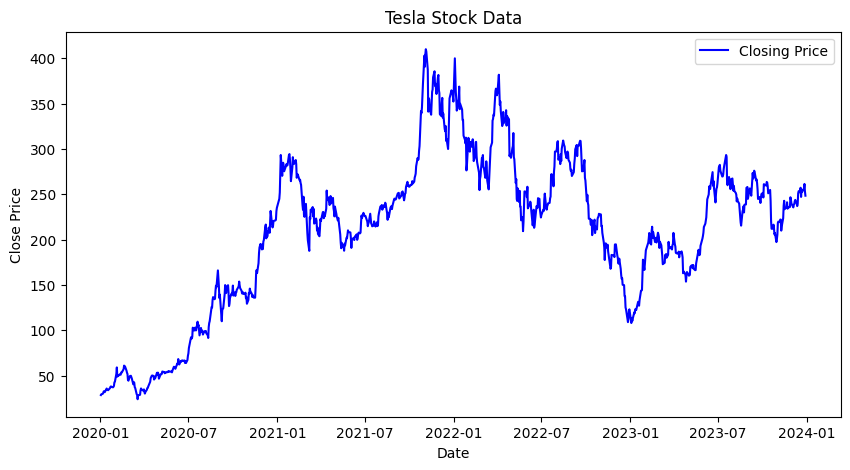

In [14]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(title)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Data")

[*********************100%***********************]  1 of 1 completed


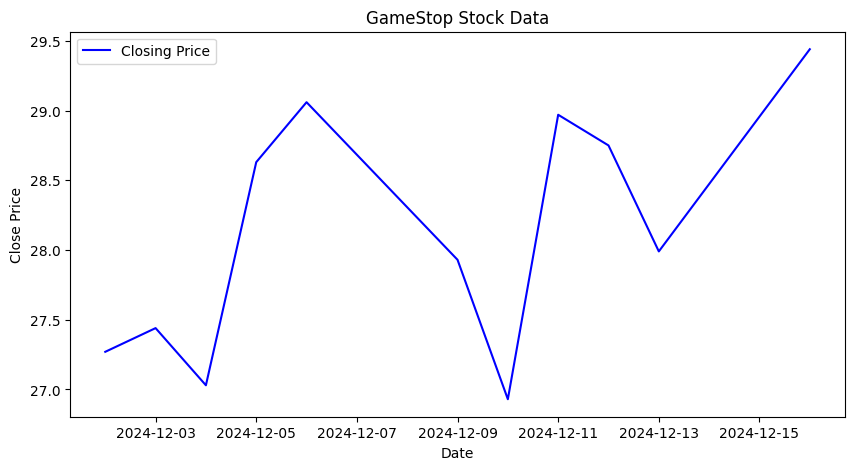

In [19]:
gme_data = yf.download("GME", start="2024-12-01", end="2024-12-17")
gme_data.reset_index(inplace=True)


make_graph(gme_data, "GameStop Stock Data")